In [1]:
from astropy.table import Table
from glob import glob
import os
from pathlib import Path
import matplotlib.pylab as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable


import numpy as np
import pandas as pd
import sys
sys.path.insert(1, '../../code/')

# import custom module
from code import *
from astropy.io import fits

In [15]:
fnames = glob('../../data/eROSITA/*.fits')

clusterList = np.load('../../clusterList.npy')


columns = clusterList.dtype.names
print(columns)


df = pd.DataFrame(clusterList,columns=columns)
max(df.R500_pixel)

('id', 'snap_id', 'snapnum', 'uid', 'x', 'y', 'z', 'x_pixel', 'y_pixel', 'i_sector', 'M500_msolh', 'r500_kpch', 'gas_frac', 'star_frac', 'T_kev', 'Lx_ergs', 'Y500c', 'M_sat_M_cD', 'cshift', 'vx', 'vy', 'vz', 'R500_pixel', 'R500_deg', 'simname', 'Tobs', 'Dcomoving_Mpch', 'redshift', 'simRan')


78.92613220214844

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
73535


<ipython-input-17-8dab214c35d1>:35: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(cluster),cmap=cmap,interpolation='none',zorder=20)
<ipython-input-17-8dab214c35d1>:52: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(cluster_shift),cmap=cmap,interpolation='none',zorder=20)


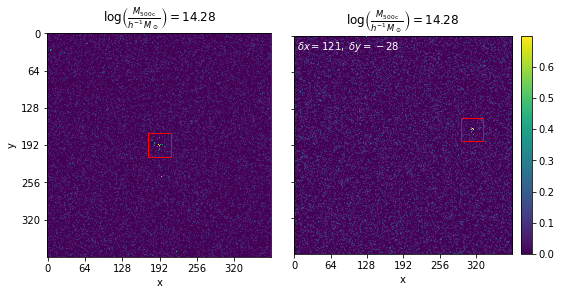

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
73920


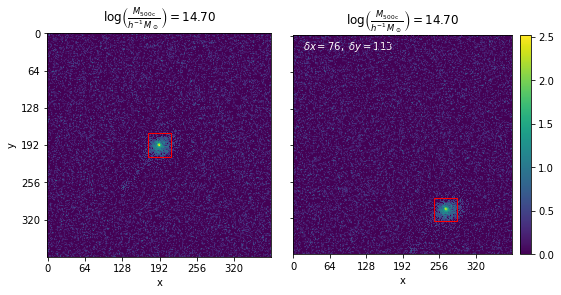

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
53964


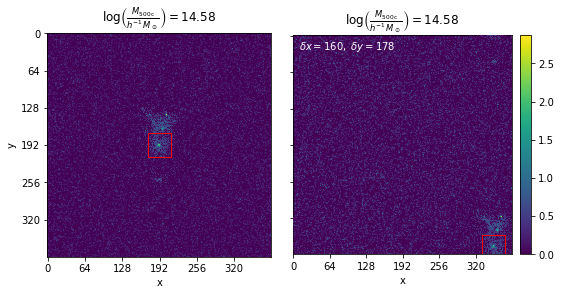

In [17]:
for fpath in fnames:
    with fits.open(fpath) as data:
        cluster = pd.DataFrame(data[0].data)
    cluster = cluster.to_numpy()
    
    file_name = Path(fpath).stem
    cluster_row = clusterList[clusterList['id']==int(file_name)]
    log_m = np.log10(cluster_row['M500_msolh'])[0]
    if log_m < 14.25:
        continue
    fig, axes = plt.subplots(nrows = 1, ncols=2, figsize=(8,4),sharey=True)
    cmap = mpl.cm.viridis
    
    for idx in [0,1]:
        
        # grab current axis
        ax = axes[idx]
        ax.set_title(r'$\log\left(\frac{M_\mathrm{500c}}{h^{-1}\,M_\odot}\right) = $'+'{:.2f}'.format(log_m))

            
        # ADD NOISE
        lam = 0.1133929878
        noise = np.random.poisson(lam=lam, size=cluster.shape)
        ax.imshow(noise,cmap=cmap)
                
        print(cluster)
        # SET TICKS
        ax.set_xticks(np.linspace(0,384,7))
        ax.set_yticks(np.linspace(0,384,7)) 
        ax.set_xlabel("x")
        ax.invert_yaxis()
        size = 40
        mid_pix = 192-size/2
        if idx == 0:
            im = ax.imshow(np.log10(cluster),cmap=cmap,interpolation='none',zorder=20)

            rectangle = plt.Rectangle((mid_pix,mid_pix), size, size,ec="red",fill=False,zorder=2000)
            ax.add_patch(rectangle)
            ax.set_ylabel("y")
        if idx == 1:
            axis_idx = np.random.randint(low=0,high=3,size=1) # 0 or 1, 3

            x_shift = np.random.randint(low=-192,high=192,size=1)[0]
            y_shift = np.random.randint(low=-192,high=192,size=1)[0]
            
            x = mid_pix + x_shift
            y = mid_pix + y_shift

            cluster_shift = np.roll(cluster,shift=y_shift,axis=0)
            cluster_shift = np.roll(cluster_shift,shift=x_shift,axis=1)
            
            im = ax.imshow(np.log10(cluster_shift),cmap=cmap,interpolation='none',zorder=20)
            rectangle = plt.Rectangle((x,y), size, size,ec="red",fill=False,zorder=2000)
            ax.add_patch(rectangle)
            
            print(np.argmax(cluster))
            
            # ADD COLOR BAR
            divider = make_axes_locatable(ax)
            cax = divider.append_axes("right", size="5%", pad=0.12)
            plt.colorbar(im, cax=cax)
            
            
            ax.text(0.25, 0.95, r'$\delta x={}, \ \delta y={}$'.format(x_shift,y_shift), ha='center', va='center', transform=ax.transAxes,color='white')

    plt.tight_layout()
    plt.savefig('../../figs/eROSITA/transform/' + file_name + '.png',dpi=250,bbox_inches='tight')

    plt.show()
    plt.close()

In [6]:
# neural network thoughts
neuron_count = 384*384
print(neuron_count)

# wavelet decomposition

# building a cnn from papers
# x-rayr

147456


One-to-one 2/11/2020

- poisson distribution value and photon counts 
    - ~0.11 photon count per second?
    - 
    
- randomizing center of cluster
    - managed this, mostly
    - concerned with separation of cluster at bordered with numpy roll
        - lower shift limits (look R500_pixel)
        - identifies clusters within max(shift) of borders of image
    
- able to retreive cluster statstics from .npy file
    - mass
    - noticied x,y,z coordinates available=> can this be transformed to center of cluster pixel? (see above)
        - for randomizing cluster center
        - for help analyzing how CNN identifies center or not (much later)
        
to do:
wavelet decomposition 

Thomas boller

0.5 - 2 keV
z = 0.1-0.3
Mlog = 
